In [1]:
%load_ext autoreload
%matplotlib inline

# Example usage of DeepLabCut -analysis

## Extract positions on a video using a trained model

Open anaconda prompt and `activate deeplabcut` and navigate to the DeepLabCut folder:

`cd Documents\apps\DeepLabCut-master\Analysis-tools`

Then you need to set a couple of environment variables:
`set TF_CUDNN_USE_AUTOTUNE=0`
`set CUDA_VISIBLE_DEVICES=0`

Crop the videos using ....

Now we are ready to run the DeepLabCut model on the new video.

Place all the videos you want to analyse in `DeepLabCut-master/videos`. Check the settings in `DeepLabCut-master/myconfig_analysis.py`.

Now run AnalyzeVideos:

`python AnalyzeVideos.py`

The output labels should be saved in the video as csv files and can be uploaded in Python

In [2]:
import matplotlib.pylab as plt
import numpy as np
import scipy as sc
import os

from dlca.readers import DLCsv

In [3]:
path = os.path.abspath('data')
local_file = DLCsv('test_tracking.csv', path=path)

In [4]:
import matplotlib.pylab as plt


plt.show()

In [5]:
rw = local_file.raw_df

x_n = rw.nose.x
y_n = rw.nose.y

time = np.arange(len(x_n))

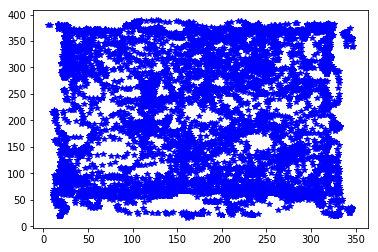

In [6]:
plt.plot(x_n, y_n, 'b*')

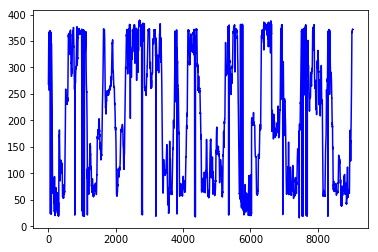

In [7]:
plt.plot(time, y_n, 'b-')

In [8]:
clean = local_file.clean(min_like=0.95, max_vel=100, save=False)
x = clean.loc[:, ('nose', 'x')].values
y = clean.loc[:, ('nose', 'y')].values

velocity = np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2)
time_v = np.arange(len(x_n)-1)

x_nc = clean.nose.x
y_nc = clean.nose.y

c:\users\can\cinpla\deeplabcutanalysis\dlca\dlca\mechanics.py:10: RuntimeWarning: invalid value encountered in greater
  bad_velocity_lcs = np.where(velocity > max_vel)[0]


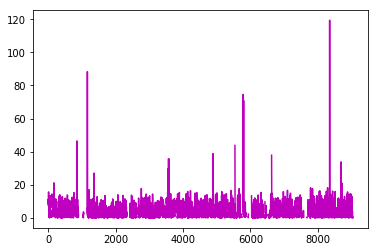

In [9]:
plt.plot(time_v, velocity, 'm-')

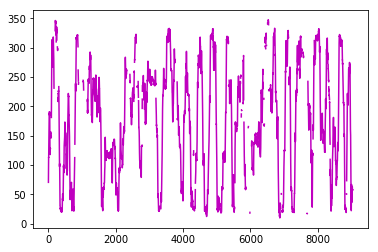

In [10]:
plt.plot(time, x_nc, 'm-')

In [11]:
np.where(velocity > 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([8351], dtype=int64),)

In [12]:
int_pol = local_file.interpolate(method='linear', save=False)
x = int_pol.loc[:, ('nose', 'x')].values
y = int_pol.loc[:, ('nose', 'y')].values

velocity = np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2)

x_ni = int_pol.nose.x
y_ni = int_pol.nose.y

print(np.where(velocity > 200))

(array([1014, 1046, 1056, 1057], dtype=int64),)


c:\users\can\cinpla\deeplabcutanalysis\dlca\dlca\mechanics.py:10: RuntimeWarning: invalid value encountered in greater
  bad_velocity_lcs = np.where(velocity > max_vel)[0]


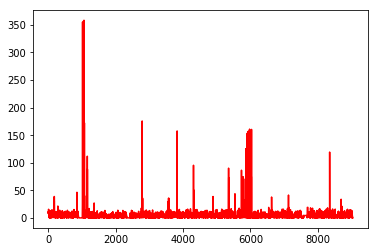

In [13]:
plt.plot(time_v, velocity, 'r-')

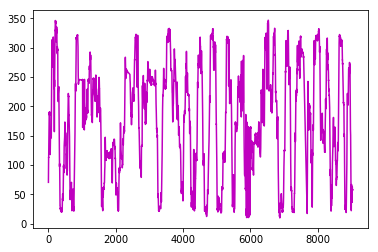

In [14]:
plt.plot(time, x_ni, 'm-')